In [41]:
import matplotlib.pyplot as plt
import numpy as np
import csv


In [42]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.rcParams.update({"figure.figsize": (8, 6),
                     "figure.facecolor": "white", "axes.titlesize": 20})


Load data from data.csv file.


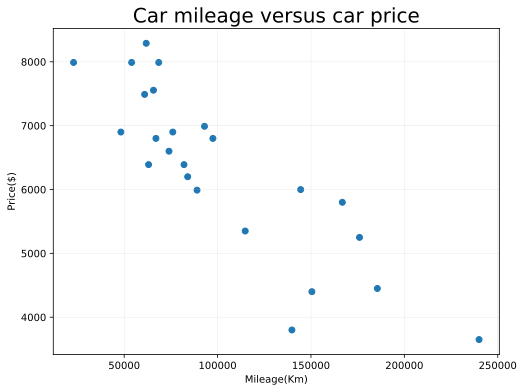

In [43]:
X = np.array([])
Y = np.array([])
with open("data.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    i = 0
    for row in csv_reader:
        if i != 0:
            X = np.append(X, float(row[0]))
            Y = np.append(Y, float(row[1]))
        i += 1
plt.scatter(X, Y)
plt.xlabel("Mileage(Km)")
plt.ylabel("Price($)")
plt.title("Car mileage versus car price")
plt.grid(linewidth=0.5, alpha=0.3)
plt.show()


Initialize parameters.


In [44]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.1
m = len(X)


Define our linear regression model.


In [45]:
def f(X):
    return theta_0 + theta_1 * X


Data Normalization.


In [46]:
maxX = max(X)
maxY = max(Y)
X = X / maxX
Y = Y / maxY


Define ploting function


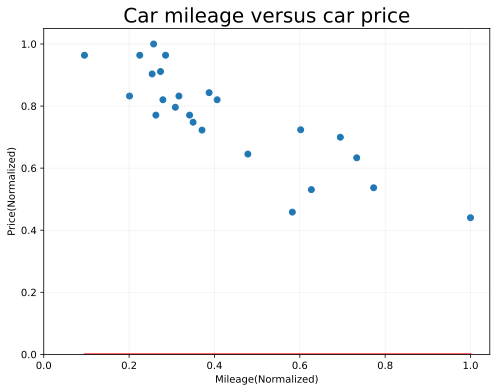

In [47]:
def plot_prices(X, Y):
    plt.scatter(X, Y)
    plt.xlabel("Mileage(Normalized)")
    plt.ylabel("Price(Normalized)")
    plt.title("Car mileage versus car price")
    plt.grid(linewidth=0.5, alpha=0.3)
    plt.plot(X, f(X), color="r", lw=2)
    plt.xlim(0)
    plt.ylim(0)
    plt.show()


plot_prices(X, Y)


Define the mean squared error (MSE) cost function.


In [48]:
def cost():
    return (1 / (2 * m)) * sum((f(X) - Y) ** 2)


Train the model using gradient descent algorithm.


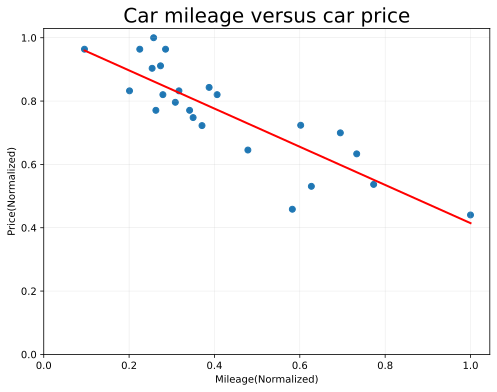

In [49]:
epoch = 1000
history = []
history.append(cost())
while epoch >= 0:
    tmp_theta_0 = (1 / m) * sum(f(X) - Y)
    tmp_theta_1 = (1 / m) * sum(X * (f(X) - Y))
    theta_0 -= learning_rate * tmp_theta_0
    theta_1 -= learning_rate * tmp_theta_1
    history.append(cost())
    epoch -= 1

plot_prices(X, Y)


Adjust theta_0 and theta_1.


In [50]:
theta_0 *= maxY
theta_1 *= maxY / maxX


Display cost function values.


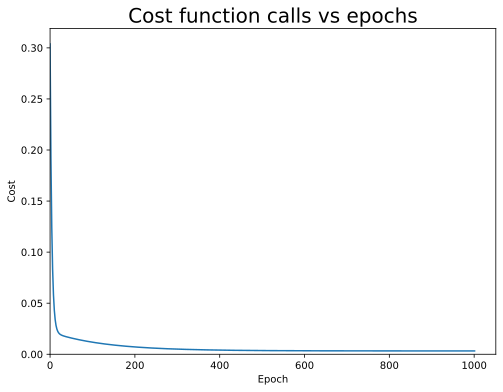

In [51]:
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.xlim(0)
plt.ylim(0)
plt.title("Cost function calls vs epochs")
plt.show()


Do some predictions.


In [52]:
print(f'Actual value: 3650,\tprediction: {f(240000)}')
print(f'Actual value: 4400,\tprediction: {f(150500)}')
print(f'Actual value: 6800,\tprediction: {f(67000)}')


Actual value: 3650,	prediction: 3435.761736097633
Actual value: 4400,	prediction: 5299.744593975638
Actual value: 6800,	prediction: 7038.767707191432
